# Week 2 Classification Project
## Machine Learning from Titanic Disaster


### Table of Contents
1. Objective of the Project
2. Data Collection
3. Train-Test-Split
4. Explore the Data
  - Bar graphs of Categorical Variable
   - Histogram of Quantitative Variable
5. Feature Engineering
   - Dealing with NaN Data (Age, Cabin and Embarked)
   - Converting Strings to Integer (Embarked and Sex)
   - Binning converting to categorical value (Age, Fare)
   - Concatenating and dropping columns not needed
6. Building Machine Learning Models
   - Logistic Regression
   - Decision Tree
   - Random Forest
7. Cross Validation and Hyperparameter Optimization
8. Testing
9. Further Evaluation Metrics
    - Confusion Matrix
    - Receiver Operator Curve (ROC) and Area Under the Curve (AUC)



### 1. Objective of the Project

This project analyses and predicts the kind of passengers that were likely to survive the Titanic tradegy, by using Machine Learning tools. 


![Titanic](titanicbynumber.png)


(cut out from the original picture)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline
import math


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score 
#import pprint

from sklearn import linear_model, datasets

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

### 2. Data Collection

In [2]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_test = pd.read_csv('test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Definition of Data Labels
- Survived: 0 = No, 1 = Yes
- Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- SibSp: Number of siblings - spouses
- Parch: Number of parents - children
- Ticket: Ticket number
- Cabin: Cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton



In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. Train - test Split

In [7]:
X=titanic.drop(['Survived'], axis=1)
y=titanic['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
X_train.shape, X_test.shape

((668, 11), (223, 11))

### 3. Explore the Data
Bar graph of the categorical variables
- Pclass
- Sex
- SibSp
- Parch
- Embarked

In [10]:
def bar_graph(column):
    survived = titanic[titanic['Survived']==1][column].value_counts()
    perished = titanic[titanic['Survived']==0][column].value_counts()
    titanic_df = pd.DataFrame([survived,perished])
    titanic_df.index = ['Survived','Perished']
    titanic_df.plot(kind='bar', stacked=True ,figsize=(10,5))

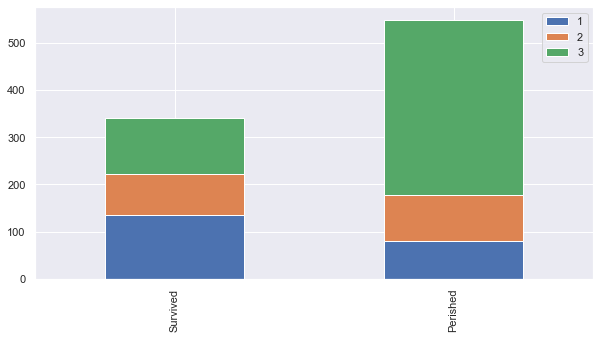

In [11]:
bar_graph('Pclass')

*The graph shows more passengers in 1st class likely survived and more 3rd class passengers likely perished.*
____

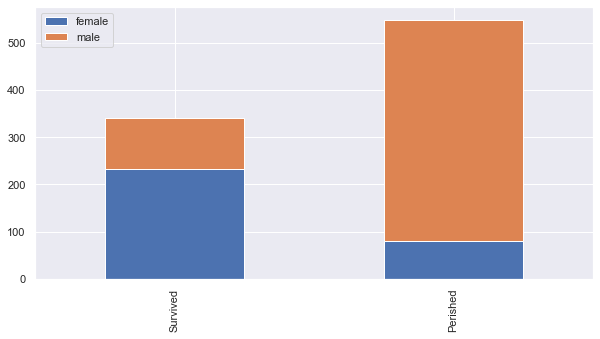

In [12]:
bar_graph('Sex')

*The graph shows more female passengers likely survived than male*
___

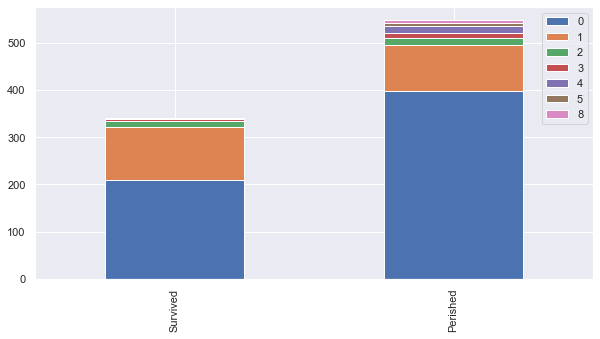

In [13]:
bar_graph('SibSp')

*The graph shows that passengers travelling without siblings nor spouse likely perished, while those with at least one sibling or spouse likely survived.*
______

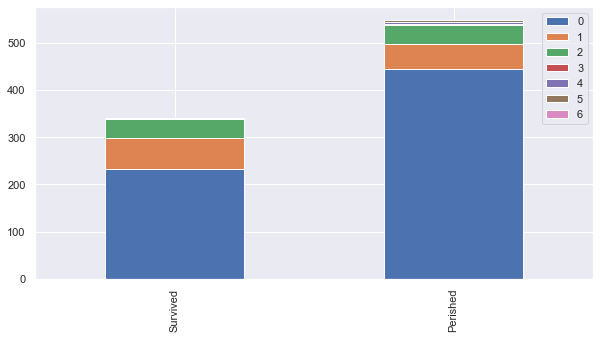

In [14]:
bar_graph('Parch')

*The graph shows that passengers travelling alone likely perished, while those family likely survived.*
______

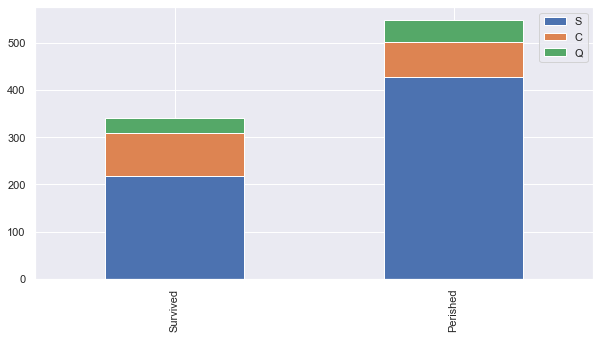

In [15]:
bar_graph('Embarked')

*The graph shows that passengers aboarding from Cherbourg likely survived, while most of passengers aboarding from Southampton and Queenstown likely perished.* 
______

Histogram of quantitative variables:
- Age
- Fare

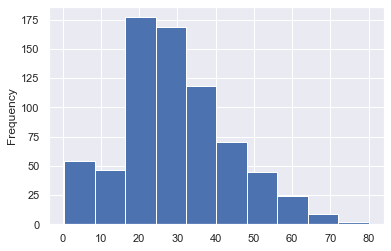

In [16]:
titanic['Age'].plot.hist()

Age and Sex corelation

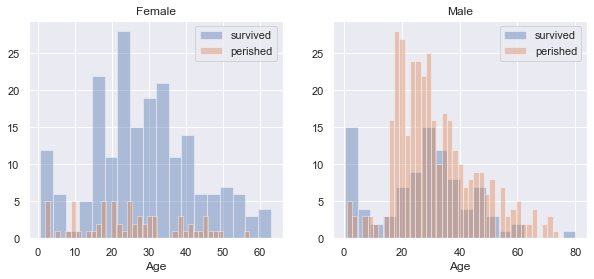

In [17]:
survived = 'survived'
perished = 'perished'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = perished, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = perished, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

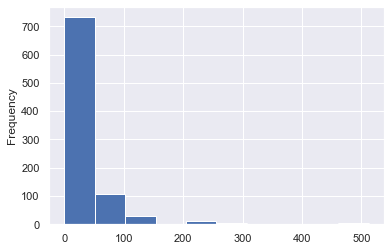

In [18]:
titanic['Fare'].plot.hist(bins=10)

### 4. Feature Engineering

In [82]:
titanic = pd.read_csv('train.csv')

In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

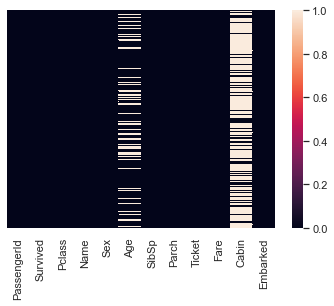

In [87]:
sns.heatmap(titanic.isnull(), yticklabels=False)

### Dealing with NaN Data
 - Age, Embarked , Cabin

In [88]:
titanic['Age'].fillna((titanic['Age'].mean()), inplace=True)

In [89]:
titanic['Embarked'].fillna((titanic['Embarked'].mode()), inplace=True)

In [90]:
titanic.drop('Cabin', axis=1, inplace=True) #Cabin has 687 Nan

In [91]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


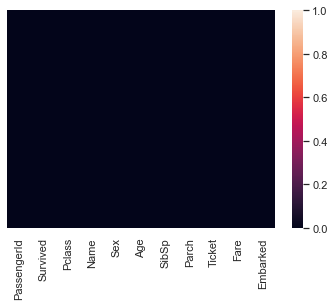

In [92]:
sns.heatmap(titanic.isnull(), yticklabels=False)

### Converting strings to integers

In [93]:
embark=pd.get_dummies(titanic['Embarked'], drop_first=True)

In [94]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [95]:
sex=pd.get_dummies(titanic['Sex'], drop_first=True)

In [96]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


### Binning (Converting to categorical variable)

##### Ages:
- 0-10 yrs old: 0
- 10-20 yrs old: 1
- 20-30 yrs old: 2
- 30-40 yrs old: 3
- 40-50 yrs old: 4
- 50-60 yrs old: 5
- 60-up yrs old: 6


In [97]:
data = [titanic]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 6

In [98]:
titanic['Age'].value_counts()

2    408
3    155
1    116
4     84
0     64
5     42
6     22
Name: Age, dtype: int64

##### Fare:
- 0-30 pounds: 0
- 30-70 pounds: 1
- 70-100 pounds: 2
- 100 up pounds: 3

In [99]:
data = [titanic]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 30, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 70), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 70) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [100]:
titanic['Fare'].value_counts()

0    666
1    120
3     53
2     52
Name: Fare, dtype: int64

In [101]:
titanic_concat = pd.concat([titanic, sex, embark], axis=1)

In [102]:
titanic_concat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,2,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,0,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,1,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,0,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2,0,0,211536,0,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,0,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,2,1,2,W./C. 6607,0,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,2,0,0,111369,0,C,1,0,0


### Dropping columns not needed

In [103]:
titanic_concat.drop(['PassengerId', 'Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [104]:
titanic_concat

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,2,1,0,0,1,0,1
1,1,1,3,1,0,2,0,0,0
2,1,3,2,0,0,0,0,0,1
3,1,1,3,1,0,1,0,0,1
4,0,3,3,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,2,0,0,0,1,0,1
887,1,1,1,0,0,0,0,0,1
888,0,3,2,1,2,0,0,0,1
889,1,1,2,0,0,0,1,0,0


### 6. Building Machine Learning Models

In [190]:
model_data = titanic_concat

In [191]:
X = model_data.drop(['Survived'], axis=1)
y = model_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Logistic Regression Model

In [192]:
titanic_lrm = LogisticRegression()
titanic_lrm.fit(X_train, y_train)
y_pred = titanic_lrm.predict(X_test)
titanic_lrm_score = round(titanic_lrm.score(X_train, y_train)* 100, 2)
titanic_lrm_score

81.59

#### Decision Tree Model

In [193]:
model_data = titanic_concat
titanic_dtm = DecisionTreeClassifier()
titanic_dtm.fit(X_train, y_train)
y_pred = titanic_dtm.predict(X_test)  

titanic_dtm_score = round(titanic_dtm.score(X_train, y_train)* 100, 2)
titanic_dtm_score

89.67

#### Random Forest Model

In [194]:
titanic_rfm = RandomForestClassifier(n_estimators=50)
titanic_rfm.fit(X_train, y_train)
y_pred = titanic_rfm.predict(X_test)
titanic_rfm.score(X_train, y_train)
titanic_rfm_score = round(titanic_rfm.score(X_train, y_train)* 100, 2)
titanic_rfm_score

89.67

Comparing the models

In [195]:
comparison = pd.DataFrame({
    'ML Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Score': [titanic_lrm_score, titanic_dtm_score, titanic_rfm_score]
              })

score_compare = comparison.sort_values(by='Score', ascending=False)
score_compare = score_compare.set_index('Score')
score_compare.head(9)

,ML Model
Score,
89.67,Decision Tree
89.67,Random Forest
81.59,Logistic Regression


### 7. Optimizing Hyperparameters and Cross-Validation

optimizing Random Forest

In [196]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [197]:
acc_score = cross_val_score(titanic_rfm, X_train, y_train, cv=15, verbose = 4,scoring='accuracy') 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.911, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.822, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.844, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] .................................... , score=0.800, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.756, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.733, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.800, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.867, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.727, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.750, total=   0.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.3s finished


In [198]:
acc_score.mean()

0.8037373737373739

In [199]:
titanic_lrm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [200]:
param_grid = {
    'class_weight': ['balanced'],
    'verbose': [1, 2, 3, 4, 5]
}

In [201]:
grid_search = GridSearchCV(
    estimator = titanic_lrm, 
    param_grid = param_grid, 
    cv=5, 
    return_train_score = True, 
    scoring ='neg_mean_absolute_error',
    n_jobs = 4
)

In [202]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'class_weight': ['balanced'],
                         'verbose': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [205]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'class_weight': ['balanced'],
                         'verbose': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [206]:
grid_search.best_params_

{'class_weight': 'balanced', 'verbose': 1}

Cross Validation all 3 models

In [207]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

In [208]:
models = [titanic_lrm, titanic_dtm, titanic_rfm]

In [209]:
def modelling_fit():
    for i in range(len(models)):
        score = cross_val_score(models[i], 
                                X_train, y_train, 
                                cv=kf, verbose =4,
                                n_jobs=1, scoring= 'accuracy')
        print("Score of Modelling",i,":",round(np.mean(score)*100,2))

In [210]:
modelling_fit()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.776, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.851, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.791, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.866, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.818, total=   0.0s
Score of Modelling 1 : 80.39
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.821, total=   0.3s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.731, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] .................................... , score=0.791, total=   0.4s
[CV]  ................................................................
[CV] .................................... , score=0.761, total=   0.3s
[CV]  ................................................................
[CV] .................................... , score=0.776, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.910, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.851, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.818, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.864, total=   0.1s
Score of Modelling 2 : 80.7


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished


### 8. Testing

all models, then cross validate again

In [211]:
titanic_lrm_test = LogisticRegression()
titanic_lrm_test.fit(X_test, y_test)
y_pred = titanic_lrm_test.predict(X_test)

titanic_lrm_score_test = round(titanic_lrm.score(X_test, y_test)* 100, 2)
titanic_lrm_score_test

75.78

In [212]:
titanic_dtm_test = DecisionTreeClassifier()
titanic_dtm_test.fit(X_train, y_train)
y_pred = titanic_dtm_test.predict(X_test)  

titanic_dtm_score_test = round(titanic_dtm_test.score(X_test, y_test)* 100, 2)
titanic_dtm_score_test

76.68

In [215]:
titanic_rfm_test = RandomForestClassifier(n_estimators=50)
titanic_rfm_test.fit(X_test, y_test)
y_pred = titanic_rfm_test.predict(X_test)  

titanic_rfm_test.score(X_test, y_test)
titanic_rfm_score_test = round(titanic_rfm_test.score(X_test, y_test)* 100, 2)
titanic_rfm_score_test

88.79

In [216]:
kf_test = KFold(n_splits=10, shuffle=True, random_state=0)

In [217]:
models_test = [titanic_lrm_test, titanic_dtm_test, titanic_rfm_test]

In [218]:
def modelling_fit_test():
    for i in range(len(models_test)):
        score = cross_val_score(models_test[i], 
                                X_train, y_train, 
                                cv=kf, verbose=4,
                                n_jobs=1, scoring= 'accuracy')
        print("Score of Modelling Test",i,":",round(np.mean(score)*100,2))

In [219]:
modelling_fit_test()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.776, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.851, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.791, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.866, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.851, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.761, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.836, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.776, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.746, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.925, total=   0.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.806, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.776, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.776, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.896, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.866, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.818, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.864, total=   0.1s
Score 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


### 9. Further Evaluation Metrics

Precision vs recall

In [220]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score

In [221]:
y_pred = titanic_lrm_test.predict(X_test)

In [224]:
print(precision_score(y_pred, y_test), recall_score(y_pred, y_test))

0.6888888888888889 0.7560975609756098


In [226]:
y_pred = titanic_dtm_test.predict(X_test)

In [227]:
print(precision_score(y_pred, y_test), recall_score(y_pred, y_test))

0.6111111111111112 0.7638888888888888


In [228]:
y_pred = titanic_rfm_test.predict(X_test)

In [229]:
print(precision_score(y_pred, y_test), recall_score(y_pred, y_test))

0.8 0.9113924050632911


#### Confusion Matrix

In [241]:
y_pred = titanic_rfm_test.predict(X_test)

In [242]:
titanic_conmat = confusion_matrix(y_pred, y_test)
titanic_conmat

array([[126,  18],
       [  7,  72]], dtype=int64)

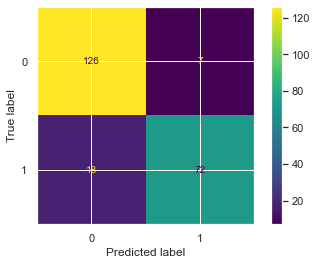

In [244]:
plot_confusion_matrix(titanic_rfm_test, X_test, y_test)

#### Receiver Operator Curve (ROC) and Area Under the Curve (AUC)

In [245]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve

In [246]:
titanic_rfm_test

RandomForestClassifier(n_estimators=50)

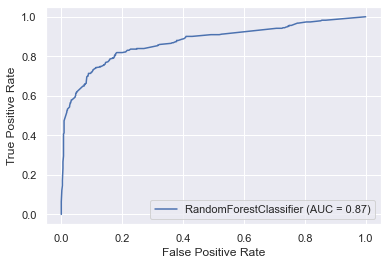

In [247]:
plot_roc_curve(titanic_rfm_test, X, y)   

### Calculating area under the curve > 0.7 acceptable. Better > 0.8


In [249]:
titanic_rfm_score_test = titanic_rfm_test.score(X_test, y_test)


print("Area under the curve = ", titanic_rfm_score_test)

Area under the curve =  0.8878923766816144
